In [117]:
import psycopg2
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "3.250.4.75",
    port = "5432",
    database = "dap_project")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    #dbCursor.execute('CREATE DATABASE dap_project;')
    #print("Database created sucessfully in postgres")
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)

In [39]:
import pandas as pd

In [2]:
sql= '''
select genre from movies;

'''
dbCursor.execute(sql)
data= dbCursor.fetchall()
print(data)

[('Drama',), ('Comedy',), ('Adventure',), ('Animation',), ('Drama',), ('Mystery',), ('Adventure',), ('Drama',), ('Adventure',), ('Action',), ('Drama',), ('Western',), ('Animation',), ('Science Fiction',), ('Drama',), ('Science Fiction',), ('Drama',), ('Comedy',), ('Drama',), ('Drama',), ('Adventure',), ('Drama',), ('Mystery',), ('Science Fiction',), ('Drama',), ('Adventure',), ('Adventure',), ('Drama',), ('Adventure',), ('Action',), ('Action',), ('Action',), ('Action',), ('Comedy',), ('Comedy',), ('Crime',), ('Action',), ('Adventure',), ('Science Fiction',), ('Thriller',), ('Action',), ('Romance',), ('Drama',), ('Crime',), ('Adventure',), ('Adventure',), ('Adventure',), ('Adventure',), ('Animation',), ('Documentary',), ('Drama',), ('Romance',), ('Horror',), ('Fantasy',), ('Drama',), ('Adventure',), ('Science Fiction',), ('Thriller',), ('Science Fiction',), ('Drama',), ('Drama',), ('Science Fiction',), ('Thriller',), ('Fantasy',), ('Thriller',), ('Adventure',), ('Science Fiction',), ('H

In [4]:
sql='''
select vote_average from movies where id=104;
'''
dbCursor.execute(sql)
data = dbCursor.fetchall()
print(data)

[(Decimal('7.30'),)]


In [5]:
sql='''
select title,runtime from movies where vote_average>= 6'''
dbCursor.execute(sql)
data= dbCursor.fetchall()
print(data)

[('Shadows in Paradise', 72), ('Mean Machine', 99), ('Star Wars', 121), ('Finding Nemo', 100), ('American Beauty', 122), ('Citizen Kane', 119), ('The Fifth Element', 126), ('Metropolis', 153), ('Pirates of the Caribbean The Curse of the Black Pearl', 143), ('Kill Bill Vol 1', 111), ('Apocalypse Now', 153), ('Unforgiven', 131), ('The Simpsons Movie', 87), ('Eternal Sunshine of the Spotless Mind', 108), ('A History of Violence', 96), ('2001 A Space Odyssey', 149), ('Talk to Her', 112), ('Brazil', 143), ('Walk the Line', 136), ('Million Dollar Baby', 132), ('War of the Worlds', 116), ('Before Sunrise', 101), ('Memento', 113), ('Blade Runner', 118), ('Raiders of the Lost Ark', 115), ('Indiana Jones and the Temple of Doom', 118), ('Dirty Dancing', 100), ('Indiana Jones and the Last Crusade', 127), ('Beverly Hills Cop', 105), ('Armageddon', 151), ('Beverly Hills Cop II', 100), ('Gladiator', 155), ('All About My Mother', 101), ('Lock Stock and Two Smoking Barrels', 105), ('Taxi Driver', 114),

In [143]:
sql='''
select count(vote_average) from movies group by vote_average;'''
movies = pd.read_sql(sql, dbConnection)
line = pd.DataFrame(movies)
print(line)

    count
0      49
1      46
2      51
3       6
4       1
5       7
6       2
7       4
8       1
9       2
10     43
11      1
12     41
13      1
14      1
15      2
16     38
17     14
18      1
19     18
20     28
21     22
22     19
23      1
24      5
25     36
26     20
27     40
28      5
29     42
30      3
31     31
32     47
33     21
34     32
35     31
36     15
37     45
38     20
39     33
40     41
41      2
42      5
43     42
44     33
45      3
46     41
47     44
48     10
49     36
50      2


In [11]:
sql='''
select * from tv_shows;'''
dbCursor.execute(sql)
data=dbCursor.fetchall()
print(data)

[(2, 'Animation', 'Touchstone Television', Decimal('7'), 30, 'en'), (14, 'Comedy', 'Zinkia Entertainment', Decimal('5'), 25, 'en'), (15, 'Kids', 'WQED', Decimal('5'), 30, 'en'), (18, 'Comedy', '20th Century Fox Television', Decimal('6'), 25, 'en'), (29, 'Drama', 'TAT Communications Company', Decimal('8'), 30, 'en'), (30, 'Drama', '20th Century Fox Television', Decimal('6'), 60, 'en'), (33, 'Comedy', 'Warner Bros. Television', Decimal('6'), 30, 'en'), (34, 'Comedy', 'BBC', Decimal('8'), 30, 'en'), (35, 'Crime', 'Granada Television', Decimal('7'), 60, 'en'), (36, 'Crime', 'Pointe Studios', Decimal('7'), 60, 'en'), (41, 'Comedy', 'Sandollar Productions', Decimal('0'), 60, 'en'), (43, 'Comedy', 'Aplaplac', Decimal('9'), 30, 'es'), (44, 'Animation', 'Bohbot Communications', Decimal('6'), 22, 'it'), (45, 'Documentary', 'BBC', Decimal('7'), 60, 'en'), (47, 'Comedy', 'Grupo Televisa', Decimal('9'), 23, 'es'), (51, 'Drama', 'Columbia Pictures Television', Decimal('0'), 45, 'en'), (52, 'Comedy',

In [19]:
sql='''select count(id) from movies
;'''
dbCursor.execute(sql)
data=dbCursor.fetchall()
print(data)

[(1084,)]


In [139]:
sql='''select count(id),genre from movies group by genre
;'''
movies = pd.read_sql(sql, dbConnection)
df_movies = pd.DataFrame(movies)
print(df_movies)

    count            genre
0      86            Crime
1      13        Animation
2       5      Documentary
3      19          Romance
4       4          History
5      22          Mystery
6       6            Music
7      36          Fantasy
8       2         TV Movie
9      38  Science Fiction
10    106           Horror
11    221            Drama
12    175           Action
13     44         Thriller
14     24          Western
15    150           Comedy
16    125        Adventure
17      6              War
18      2           Family


In [45]:
import matplotlib.pyplot as plt

In [135]:
df_movies

,count,genre
0,86,Crime
1,13,Animation
2,5,Documentary
3,19,Romance
4,4,History
5,22,Mystery
6,6,Music
7,36,Fantasy
8,2,TV Movie
9,38,Science Fiction


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text xticklabel objects>)

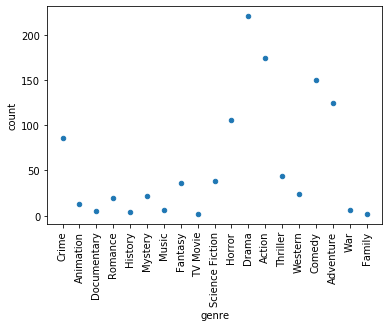

In [137]:
df.plot(kind='scatter',x='genre',y='count')
plt.xticks(rotation=90)

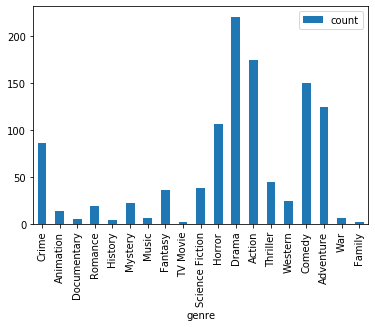

In [49]:
df.plot(kind='bar',x='genre',y='count')

In [69]:
sql='''select count(id) from tv_shows
;'''
dbCursor.execute(sql)
tv_shows=dbCursor.fetchall()
print(tv_shows)

[(3713,)]


In [78]:
sql='''select count(id),genre from tv_shows group by genre
;'''
tv_shows = pd.read_sql(sql, dbConnection)
df_tv_shows = pd.DataFrame(tv_shows)
print(df_tv_shows)

    count               genre
0     223         Documentary
1       1             History
2      56             Mystery
3      35                Kids
4      10               Music
5       1             Fantasy
6      64                Soap
7      56                Talk
8     857               Drama
9       2              Action
10    208             Reality
11     24                News
12     70             Western
13    927              Comedy
14    301  Action & Adventure
15    127              Family
16    145    Sci-Fi & Fantasy
17     23      War & Politics
18    110               Crime
19    473           Animation


In [72]:
df_tv_shows

,count,genre
0,223,Documentary
1,1,History
2,56,Mystery
3,35,Kids
4,10,Music
5,1,Fantasy
6,64,Soap
7,56,Talk
8,857,Drama
9,2,Action


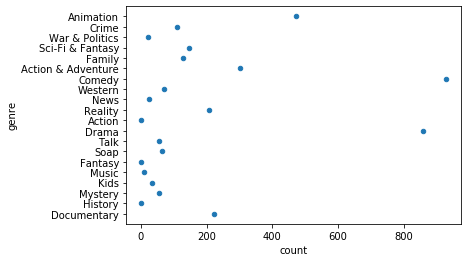

In [75]:
df_tv_shows.plot(kind='scatter',x='count',y='genre')

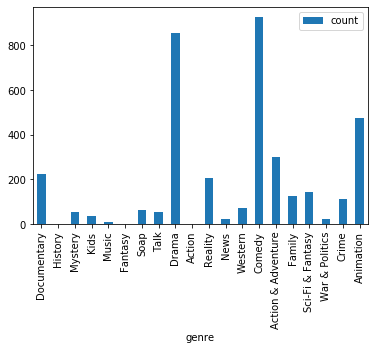

In [76]:
df_tv_shows.plot(kind='bar',x='genre',y='count')

In [88]:

sql='''select count(genre),languages from tv_shows group by languages;'''

tv_shows = pd.read_sql(sql, dbConnection)
df_tv_shows = pd.DataFrame(tv_shows)
print(df_tv_shows)




    count languages
0       3        bs
1       2        sr
2      72        fr
3       2        sk
4       3        tr
5       1        nn
6    3004        en
7       7        hi
8       2        af
9       4        fi
10      7        ru
11      1        uz
12      3        he
13      1        vi
14      1        fa
15      1        hr
16      1        xx
17      1        is
18     11        cs
19    235        ja
20      2        cn
21     16        sv
22      1        ro
23     56        de
24     23        nl
25      1        mi
26      1        et
27      4        ar
28      1        ca
29      4        no
30     28        pt
31      3        ur
32      3        hu
33     10        pl
34      4        el
35     46        ko
36     11        zh
37     27        it
38    107        es
39      2        da
40      1        cy


In [83]:
df_tv_shows

,count,languages
0,3,bs
1,2,sr
2,72,fr
3,2,sk
4,3,tr
5,1,nn
6,3004,en
7,7,hi
8,2,af
9,4,fi


In [103]:
sql=''' SELECT 
m.id,title FROM movies m INNER JOIN tv_shows t ON t.id = m.id GROUP BY m.id;'''
tv_shows = pd.read_sql(sql, dbConnection)
df_tv_shows1 = pd.DataFrame(tv_shows)
print(df_tv_shows1)

       id                                              title
0    4512  The Assassination of Jesse James by the Coward...
1     951                                   Kindergarten Cop
2    4284                                  Sasquatch Hunters
3     764                                      The Evil Dead
4     658                                         Goldfinger
..    ...                                                ...
234   150                                            48 Hrs 
235   429                      The Good the Bad and the Ugly
236   141                                       Donnie Darko
237  3022                              Dr Jekyll and Mr Hyde
238   790                                            The Fog

[239 rows x 2 columns]


In [104]:
df_tv_shows1

,id,title
0,4512,The Assassination of Jesse James by the Coward...
1,951,Kindergarten Cop
2,4284,Sasquatch Hunters
3,764,The Evil Dead
4,658,Goldfinger
...,...,...
234,150,48 Hrs
235,429,The Good the Bad and the Ugly
236,141,Donnie Darko
237,3022,Dr Jekyll and Mr Hyde
